In [6]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_to_load = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_clinical_trial_data = pd.merge(clinical_trial_data_to_load, mouse_drug_data_to_load, how="left",on="Mouse ID")

# Display the data table for preview
combined_clinical_trial_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_data = combined_clinical_trial_data[["Drug", "Timepoint","Tumor Volume (mm3)"]]
tumor_volume_mean = tumor_volume_data.groupby(['Drug', 'Timepoint']).mean()
# Convert to DataFrame
tumor_volume_mean_df = pd.DataFrame(tumor_volume_mean)
# Preview DataFrame
tumor_volume_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_data = combined_clinical_trial_data[["Drug", "Timepoint","Tumor Volume (mm3)"]]
tumor_volume_sem = tumor_volume_data.groupby(['Drug', 'Timepoint']).sem()
# Convert to DataFrame
tumor_volume_sem_df = pd.DataFrame(tumor_volume_sem)
# Preview DataFrame
tumor_volume_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [9]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean = tumor_volume_mean.reset_index()
tumor_volume_mean_pivot = tumor_volume_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_volume_sem = tumor_volume_sem.reset_index()
tumor_volume_sem_pivot = tumor_volume_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_volume_mean_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


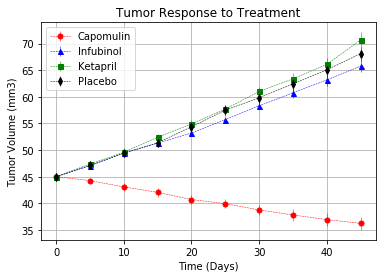

In [10]:
# Generate the Plot (with Error Bars)
graph_options_list = [
    {"drug": "Capomulin", "color": "r", "marker": "o"},
    {"drug": "Infubinol", "color": "b", "marker": "^"},
    {"drug": "Ketapril", "color": "g", "marker": "s"},
    {"drug": "Placebo", "color": "k", "marker": "d"},
]
for opt in graph_options_list:
    plt.errorbar(
        tumor_volume_mean_pivot.index, 
        tumor_volume_mean_pivot[opt["drug"]], 
        yerr=tumor_volume_sem_pivot[opt["drug"]], 
        color=opt["color"], 
        marker=opt["marker"], 
        markersize=5, 
        linestyle="dashed", 
        linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best")

# Save the Figure
plt.savefig("image/Figure1.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_sites_data = combined_clinical_trial_data[["Drug", "Timepoint","Metastatic Sites"]]
metastatic_sites_mean = metastatic_sites_data.groupby(['Drug', 'Timepoint']).mean()
# Convert to DataFrame
metastatic_sites_mean_df = pd.DataFrame(metastatic_sites_mean)
# Preview DataFrame
metastatic_sites_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sites_data = combined_clinical_trial_data[["Drug", "Timepoint","Metastatic Sites"]]
metastatic_sites_sem = metastatic_sites_data.groupby(['Drug', 'Timepoint']).sem()
# Convert to DataFrame
metastatic_sites_sem_df = pd.DataFrame(metastatic_sites_sem)
# Preview DataFrame
metastatic_sites_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites_mean = metastatic_sites_mean.reset_index()
metastatic_sites_mean_pivot = metastatic_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
metastatic_sites_sem = metastatic_sites_sem.reset_index()
metastatic_sites_sem_pivot = metastatic_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
metastatic_sites_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


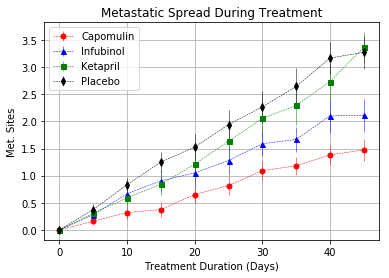

In [14]:
# Generate the Plot (with Error Bars)
for opt in graph_options_list:
    plt.errorbar(
        metastatic_sites_mean_pivot.index, 
        metastatic_sites_mean_pivot[opt["drug"]], 
        yerr=metastatic_sites_sem_pivot[opt["drug"]], 
        color=opt["color"], 
        marker=opt["marker"], 
        markersize=5, 
        linestyle="dashed", 
        linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best")
# Save the Figure
plt.savefig("image/Figure2.png")
# Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_data = combined_clinical_trial_data[["Drug", "Timepoint","Mouse ID"]]
mice_count = mice_data.groupby(['Drug', 'Timepoint']).count()["Mouse ID"]
# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count":mice_count})
# Preview DataFrame
mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [16]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.reset_index()
mice_count_df_pivot = mice_count_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
mice_count_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


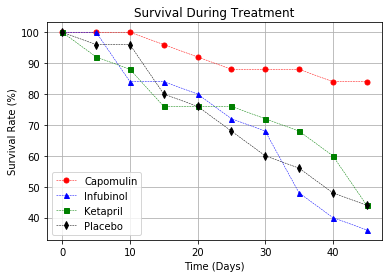

In [17]:
# Generate the Plot (Accounting for percentages)
for opt in graph_options_list:
    plt.plot(
        (100 * mice_count_df_pivot[opt["drug"]] / 25), 
        color=opt["color"], 
        marker=opt["marker"], 
        linestyle="dashed", 
        markersize=5, 
        linewidth=0.50)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best")

# # Save the Figure
plt.savefig("image/Figure3.png")

# Show the Figure
plt.show()


## Summary Bar Graph

In [18]:
percent_changes_for_each_drug_mean = 100*(tumor_volume_mean_pivot.iloc[-1] - tumor_volume_mean_pivot.iloc[0]) / tumor_volume_mean_pivot.iloc[0]
percent_changes_for_each_drug_mean
percent_changes_for_each_drug_sem =  100*(tumor_volume_sem_pivot.iloc[-1] - tumor_volume_sem_pivot.iloc[0]) / tumor_volume_sem_pivot.iloc[0]
percent_changes_for_each_drug_mean



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [19]:
# Calculate the percent changes for each drug
percent_changes_for_each_drug_mean =  100 * (tumor_volume_mean_pivot.iloc[-1] - tumor_volume_mean_pivot.iloc[0]) / tumor_volume_mean_pivot.iloc[0]
percent_changes_for_each_drug_sem =  100 * (tumor_volume_sem_pivot.iloc[-1] - tumor_volume_sem_pivot.iloc[0]) / tumor_volume_sem_pivot.iloc[0]

# Display the data to confirm
percent_changes_for_each_drug_mean

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

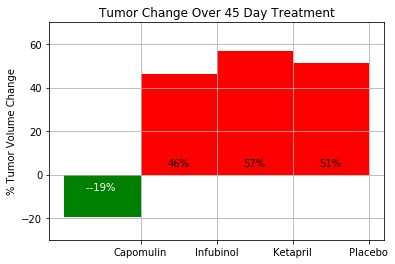

In [20]:
# Store all Relevant Percent Changes into a Tuple

changes_tuple = (percent_changes_for_each_drug_mean["Capomulin"],
               percent_changes_for_each_drug_mean["Infubinol"],
               percent_changes_for_each_drug_mean["Ketapril"],
               percent_changes_for_each_drug_mean["Placebo"],
              )
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(changes_tuple))
width = 1
_pass = ax.bar(ind[0], changes_tuple[0], width, color='green')
_fail = ax.bar(ind[1:], changes_tuple[1:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)


# Use functions to label the percentages of changes
def label_fail(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="black")

def label_pass(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
label_pass(_pass)
label_fail(_fail)

# Save the Figure
fig.savefig("image/Figure4.png")


# Show the Figure
fig.show()